In [641]:
# Setup
import pandas as pd
import numpy as np
data = pd.read_json("data/a3cleanedonly2015.json")

#### Exploration

In [642]:
pd.crosstab(data["Manner_of_death"], data["Mental_illness"], normalize="index")

Mental_illness,False,True
Manner_of_death,,
Other,1.000000,0.000000
Shot,0.799308,0.200692
Shot and Tasered,0.606061,0.393939
Tasered,0.586207,0.413793


In [643]:
data["Armed"].value_counts()

Gun                    683
                       533
Knife                  171
Unarmed                 56
Vehicle                 36
Toy Weapon              18
Unknown Weapon           5
Guns And Explosives      3
Metal Pipe               3
Box Cutter               3
Sword                    3
Machete                  3
Hammer                   3
Screwdriver              2
Metal Stick              2
Hatchet                  2
Metal Pole               1
Tasered                  1
Crossbow                 1
Straight Edge Razor      1
Contractor'S Level       1
Cordless Drill           1
Blunt Object             1
Metal Object             1
Nail Gun                 1
Chain                    1
Beer Bottle              1
Name: Armed, dtype: int64

#### Initial cleaning steps for "manner of death" and "armed" variables

In [644]:
# Create binary "armed" variable
data["armed_binary"] = np.where((data["Armed"] == "Unarmed") | (data["Armed"] == ""), "Unarmed", "Armed")
data["armed_binary"].value_counts()

Armed      948
Unarmed    589
Name: armed_binary, dtype: int64

In [645]:
# Check
pd.crosstab(data["Armed"], data["armed_binary"])

armed_binary,Armed,Unarmed
Armed,,
,0,533
Beer Bottle,1,0
Blunt Object,1,0
Box Cutter,3,0
Chain,1,0
Contractor'S Level,1,0
Cordless Drill,1,0
Crossbow,1,0
Gun,683,0


In [646]:
clean_armed_manner = data[["Mental_illness", "Manner_of_death", "armed_binary"]]
clean_armed_manner

,Mental_illness,Manner_of_death,armed_binary
0,True,Shot,Unarmed
1,False,Shot,Unarmed
2,False,Shot,Unarmed
3,False,Shot,Unarmed
4,False,Shot,Unarmed
...,...,...,...
1532,True,Tasered,Unarmed
1533,True,Tasered,Unarmed
1534,False,Tasered,Unarmed
1535,True,Tasered,Unarmed


#### Preparing the "manner of death" data

In [647]:
# Dropping the single "other" instance
clean_armed_manner.drop(clean_armed_manner[clean_armed_manner.Manner_of_death == "Other"].index, inplace = True)

# Shortening labels for better visiblity in ring chart
clean_armed_manner["Manner_of_death"] = np.where((clean_armed_manner["Manner_of_death"] == "Shot and Tasered"), "", clean_armed_manner["Manner_of_death"])

# Split clean data into mental illness = TRUE vs. FALSE datasets
mod_mi_yes = clean_armed_manner[clean_armed_manner["Mental_illness"] == True]
mod_mi_no = clean_armed_manner[clean_armed_manner["Mental_illness"] == False]

/var/folders/w0/hp1p0mz546x0rnc9mft_s83w0000gn/T/ipykernel_24102/4137243129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_armed_manner.drop(clean_armed_manner[clean_armed_manner.Manner_of_death == "Other"].index, inplace = True)
/var/folders/w0/hp1p0mz546x0rnc9mft_s83w0000gn/T/ipykernel_24102/4137243129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_armed_manner["Manner_of_death"] = np.where((clean_armed_manner["Manner_of_death"] == "Shot and Tasered"), "", clean_armed_manner["Manner_of_death"])


In [648]:
# Make clean "manner of death" datasets for two rings

# MI = yes
mod_mi_yes_ring = mod_mi_yes.groupby('Manner_of_death').size().reset_index(name='count')

# MI = no
mod_mi_no_ring = mod_mi_no.groupby('Manner_of_death').size().reset_index(name='count')

In [649]:
mod_mi_yes_ring

,Manner_of_death,count
0,,13
1,Shot,290
2,Tasered,24


In [650]:
mod_mi_no_ring

,Manner_of_death,count
0,,20
1,Shot,1155
2,Tasered,34


In [651]:
# Export them
mod_mi_yes_ring.to_json("data/mod_mi_yes_ring.json", orient = "records")
mod_mi_no_ring.to_json("data/mod_mi_no_ring.json", orient = "records")

#### Preparing the "armed" binary data

In [652]:
armed_binary_bar = clean_armed_manner.groupby('armed_binary').size().reset_index(name='proportion')
# Turn into percentages
armed_binary_bar['proportion'] = armed_binary_bar['proportion'].div(armed_binary_bar['proportion'].sum(axis=0), axis=0).multiply(100)
# Transpose
armed_binary_bar = armed_binary_bar.transpose()
armed_binary_bar

,0,1
armed_binary,Armed,Unarmed
proportion,61.71875,38.28125


In [653]:
# Export
armed_binary_bar.to_csv("data/armed_binary_bar.csv")

#### Preparing the "mentally ill" binary data

In [654]:
mi_binary_bar = clean_armed_manner.groupby('Mental_illness').size().reset_index(name='proportion')
# Turn into percentages
mi_binary_bar['proportion'] = mi_binary_bar['proportion'].div(mi_binary_bar['proportion'].sum(axis=0), axis=0).multiply(100)
# Transpose
mi_binary_bar = mi_binary_bar.transpose()
mi_binary_bar

,0,1
Mental_illness,False,True
proportion,78.710938,21.289062


In [655]:
# Export
mi_binary_bar.to_csv("data/mi_binary_bar.csv")

#### Preparing data for line graph of proportion of mental illness cases over time

In [656]:
# Create a dataset that's just proportion of cases involving mental illness over time
# First, month-level date var
data['month'] = data.Date.dt.to_period("M")

In [657]:
count1 = data.groupby('month').size().reset_index(name='case_count')
count1

,month,case_count
0,2015-01,118
1,2015-02,117
2,2015-03,150
3,2015-04,139
4,2015-05,126
5,2015-06,103
6,2015-07,152
7,2015-08,136
8,2015-09,130
9,2015-10,127


In [658]:
count2 = data.groupby('month')['Mental_illness'].apply(lambda x: (x==True).sum()).reset_index(name='mental_illness_count')
count2

,month,mental_illness_count
0,2015-01,27
1,2015-02,17
2,2015-03,46
3,2015-04,32
4,2015-05,40
5,2015-06,30
6,2015-07,29
7,2015-08,25
8,2015-09,27
9,2015-10,15


In [659]:
mi_monthly = count1.merge(count2)
mi_monthly

,month,case_count,mental_illness_count
0,2015-01,118,27
1,2015-02,117,17
2,2015-03,150,46
3,2015-04,139,32
4,2015-05,126,40
5,2015-06,103,30
6,2015-07,152,29
7,2015-08,136,25
8,2015-09,130,27
9,2015-10,127,15


In [660]:
# Proportion var
mi_monthly["prop_mental_illness"] = mi_monthly["mental_illness_count"] / mi_monthly["case_count"] *100
mi_monthly

,month,case_count,mental_illness_count,prop_mental_illness
0,2015-01,118,27,22.881356
1,2015-02,117,17,14.529915
2,2015-03,150,46,30.666667
3,2015-04,139,32,23.021583
4,2015-05,126,40,31.746032
5,2015-06,103,30,29.126214
6,2015-07,152,29,19.078947
7,2015-08,136,25,18.382353
8,2015-09,130,27,20.769231
9,2015-10,127,15,11.811024


<AxesSubplot:xlabel='month'>

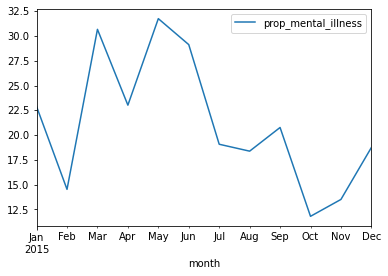

In [661]:
mi_monthly.plot.line(x = 'month', y = 'prop_mental_illness')

In [662]:
# Export this second dataset - proportion mental_illness=TRUE by month
mi_monthly[["month", "prop_mental_illness"]].to_csv("data/mi_monthly.csv")